In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
out_dir = '/Users/tanshi/Desktop/SIP/'
execfile(out_dir+'plot_routines.py')

In [2]:
#8114 in GOODS-N (14), 6592 in EGS (12), 10234(13) in EGS
candels=np.genfromtxt('sample_DR3_EGS.cat', usecols=(0, 1, 2, 8, 9, 10, 11, 12, 13, 14, 15, 20), names=['objectid', 'alpha_gr_dec', 'delta_gr_dec',\
                'flux_u','erflux_u', 'flux_b', 'erflux_b', 'flux_v', 'erflux_v', 'flux_i',\
                'erflux_i', 'class_star'], dtype="S10,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8")
m_v=-2.5*np.log10(candels['flux_v'])+23.9
m_i=-2.5*np.log10(candels['flux_i'])+23.9
m_u=-2.5*np.log10(candels['flux_u'])+23.9

index_12 = 0
index_13 = 0
for i in range(len(candels['objectid'])):
    if candels[i]['objectid'] == '6592':
        index_12 = i
    if candels[i]['objectid'] == '10234':
        index_13 = i
        
mv_12 = m_v[index_12]
mv_13 = m_v[index_13]
UV_12 = m_u[index_12] - m_v[index_12]
UV_13 = m_u[index_13] - m_v[index_13]

candels_gdn=np.genfromtxt('sample_DR3_GOODSN.cat', usecols=(0, 1, 2, 8, 9, 10, 11, 12, 13, 14, 15, 20), names=['objectid', 'alpha_gr_dec', 'delta_gr_dec',\
                'flux_u','erflux_u', 'flux_b', 'erflux_b', 'flux_v', 'erflux_v', 'flux_i',\
                'erflux_i', 'class_star'], dtype="S10,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8")
m_v=-2.5*np.log10(candels_gdn['flux_v'])+23.9
m_i=-2.5*np.log10(candels_gdn['flux_i'])+23.9
m_u=-2.5*np.log10(candels_gdn['flux_u'])+23.9

index_14 = 0

for i in range(len(candels_gdn['objectid'])):
    if candels_gdn[i]['objectid'] == '8114':
        index_14 = i
        
mv_14 = m_v[index_14]
UV_14 = m_u[index_14] - m_v[index_14]

print mv_12
print mv_13
print mv_14
print
print UV_12
print UV_13
print UV_14


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


22.05767480581427
21.763536604498032
20.769870906483707

0.2660775316691186
0.4811040937237898
-0.28021610314021217


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10


In [3]:
Mv_5 = np.loadtxt('Table_Mass_0.5.txt',usecols=(3),unpack=True)
print(Mv_5)

[18.78  18.294 17.903 17.585 17.328 17.107 16.904 16.703 16.503 16.293
 16.069 15.818 15.542 15.255 14.968 14.696 14.442 14.007 13.649 13.34
 13.061 12.801 12.559 12.328 12.114 11.919 11.746 11.604 11.488 11.397
 11.324 11.251 11.176 11.104 11.039 10.975 10.914 10.853 10.796 10.741
 10.422  9.951  9.488  9.047  8.771  8.52   8.285  8.06   7.848  7.64
  7.421  7.171  6.906  6.648  6.385  6.092  5.76 ]


In [4]:
UB_5 = np.loadtxt('Table_Mass_0.5.txt', usecols=(4),unpack=True)
print(UB_5)

BV_5 = np.loadtxt('Table_Mass_0.5.txt', usecols=(5),unpack=True)
print(BV_5)

UV_5 = UB_5 + BV_5
print(UV_5)

[ 1.164  0.984  0.847  0.73   0.628  0.543  0.471  0.406  0.343  0.282
  0.22   0.152  0.079  0.002 -0.075 -0.148 -0.216 -0.336 -0.44  -0.513
 -0.558 -0.582 -0.589 -0.586 -0.575 -0.563 -0.555 -0.553 -0.556 -0.559
 -0.564 -0.573 -0.589 -0.609 -0.631 -0.653 -0.676 -0.698 -0.72  -0.741
 -0.859 -0.995 -1.099 -1.162 -1.192 -1.21  -1.222 -1.232 -1.239 -1.245
 -1.251 -1.255 -1.26  -1.263 -1.266 -1.27  -1.272]
[ 1.462  1.451  1.407  1.357  1.303  1.25   1.202  1.155  1.109  1.06
  1.009  0.953  0.89   0.824  0.758  0.694  0.636  0.532  0.444  0.373
  0.322  0.283  0.255  0.236  0.223  0.213  0.204  0.193  0.182  0.171
  0.16   0.144  0.126  0.106  0.087  0.068  0.051  0.036  0.021  0.009
 -0.057 -0.136 -0.199 -0.242 -0.264 -0.279 -0.289 -0.297 -0.304 -0.309
 -0.315 -0.319 -0.323 -0.327 -0.33  -0.333 -0.335]
[ 2.626  2.435  2.254  2.087  1.931  1.793  1.673  1.561  1.452  1.342
  1.229  1.105  0.969  0.826  0.683  0.546  0.42   0.196  0.004 -0.14
 -0.236 -0.299 -0.334 -0.35  -0.352 -0.35  -0.35

Text(0,0.5,'Mv(mag)')

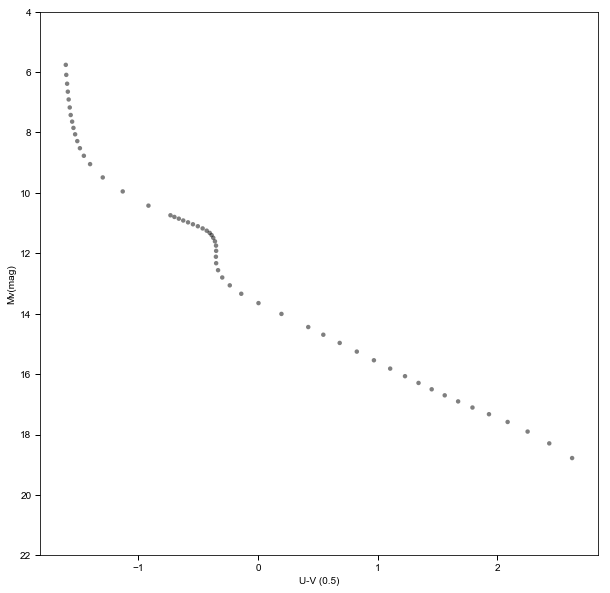

In [5]:
#plotting model WD curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_5, Mv_5, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(22,4)
plt.xlabel('U-V (0.5)')
plt.ylabel('Mv(mag)')

In [6]:
#using weighted averages for U-V from Maddie's table and the Table txt file to find corresponding Mv for each WD
mv_old = [19.79, 22.09, 19.85, 23.37, 22.69, 22.38, 22.42, 22.88, 22.7, 20.88, 21.15, 22.06, 21.76, 20.77]
mv = np.array([])
for i in range(len(mv_old)):
    mv = np.append(mv, mv_old[i]-0.169)
print mv
maddie_UV = np.array([0.61, 0.84, 0.73, 0.15, 0.02, -0.25, 0.65, 0.18, 0.17, 0.67, 0.88, 0.27, 0.48, -0.28])
Mv_wd_5 = np.array([])

for j in range(len(maddie_UV)):
    for i in range(len(UV_5)):
        if (maddie_UV[j] < UV_5[i]) and (maddie_UV[j] > UV_5[i+1]):
            weight1_5 = ((UV_5[i] - maddie_UV[j]) / (UV_5[i] - UV_5[i+1])) * 100
            weight2_5 = ((maddie_UV[j] - UV_5[i+1]) / (UV_5[i] - UV_5[i+1])) * 100
            Mv_wd_5 = np.append(Mv_wd_5, ((Mv_5[i]*weight2_5) + (Mv_5[i+1]*weight1_5)) / (weight1_5 + weight2_5))
            #UV_wd = np.append(UV_wd, (((x1*(UV[i]-x1)) + (weight1)) / ((UV[i]-x1) + (UV[i+1]-x2))))
#             print(UV_wd)
#             for i in range(len(UV_wd)):
#                 Mv_wd = np.append(Mv_wd, )
print(maddie_UV)
print(Mv_wd_5)

[19.621 21.921 19.681 23.201 22.521 22.211 22.251 22.711 22.531 20.711
 20.981 21.891 21.591 20.601]
[ 0.61  0.84  0.73  0.15  0.02 -0.25  0.65  0.18  0.17  0.67  0.88  0.27
  0.48 -0.28]
[14.82306569 15.2830979  15.06232867 13.92122917 13.67883333 13.00322222
 14.90248175 13.97716667 13.95852083 14.94218978 15.36337762 14.15070536
 14.56295238 12.8794127 ]


In [7]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Multiplying by 3.086e+13 to convert from pc to km
# Distance Modulus: mv - Mv = 5logD - 5
distance_wd_pc_5 = np.array([])
distance_wd_km_5 = np.array([])
for i in range(len(mv)):
    distance_wd_pc_5 = np.append(distance_wd_pc_5, (10 ** (((mv[i] - Mv_wd_5[i]) + 5) / 5)))
    distance_wd_km_5 = np.append(distance_wd_km_5, (distance_wd_pc_5[i] * 3.086e+13))
print(distance_wd_pc_5)
print(distance_wd_km_5)

[ 91.11436678 212.6084002   83.89464984 717.71854274 586.72329735
 694.31341357 294.91960913 558.17022613 518.19812034 142.48266966
 132.89984534 353.23109578 254.45414148 350.20106325]
[2.81178936e+15 6.56109523e+15 2.58898889e+15 2.21487942e+16
 1.81062810e+16 2.14265119e+16 9.10121914e+15 1.72251332e+16
 1.59915940e+16 4.39701519e+15 4.10128923e+15 1.09007116e+16
 7.85245481e+15 1.08072048e+16]


In [8]:
#Using trend line to guess Mv
def fitline(x):
    return 1.95*x+13.5

#Using distance modulus equation to solve for D given mv and Mv
print 19.79-fitline(0.61)
distance_wd_trend_5 = 10**((mv-fitline(maddie_UV)+5)/5)

print ('Distance in parsecs: ')
print distance_wd_trend_5
print
print('Distance in km: ')
distance_wd_km_trend_5 = distance_wd_trend_5 * 3.086e+13
print distance_wd_km_trend_5

5.1005
Distance in parsecs: 
[ 96.894695   227.30029533  89.43345319 761.55276627 625.74876335
 691.35323604 313.83400564 591.56163418 549.41435196 151.67010939
 142.23287871 374.02445604 269.77394324 338.37634886]

Distance in km: 
[2.99017029e+15 7.01448711e+15 2.75991637e+15 2.35015184e+16
 1.93106068e+16 2.13351609e+16 9.68491741e+15 1.82555920e+16
 1.69549269e+16 4.68053958e+15 4.38930664e+15 1.15423947e+16
 8.32522389e+15 1.04422941e+16]


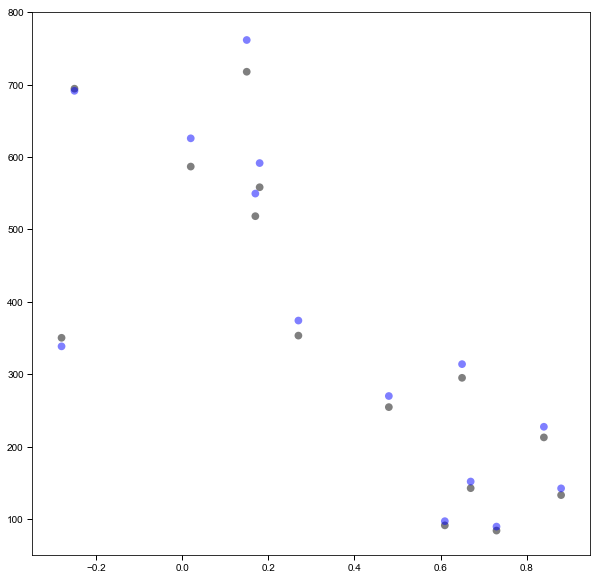

In [9]:
#plotting distance calculated from weighted averages against distance calculated by trend to compare accuracy
fig=plt.figure(figsize=(10,10))
plt.scatter(maddie_UV, distance_wd_pc_5, c='black',edgecolors='none',s=60,alpha=0.5)
plt.scatter(maddie_UV, distance_wd_trend_5, c='blue',edgecolors='none',s=60,alpha=0.5)

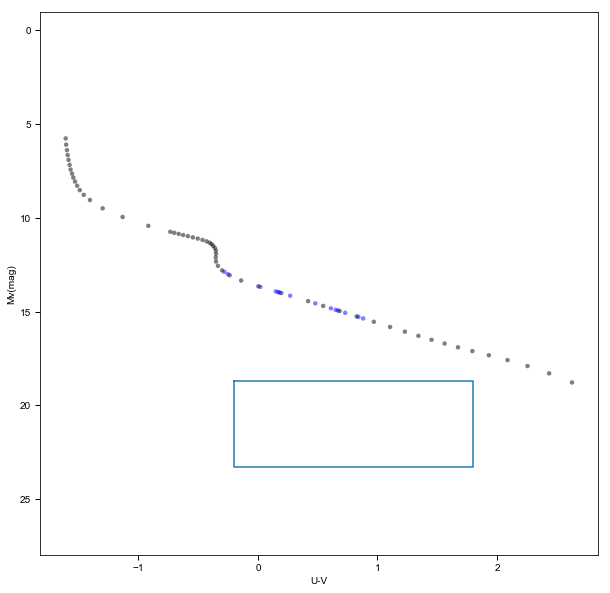

In [10]:
#plotting Mv calculated from weighted averages against UV vs Mv (table txt file) plot
#Mv from weighted averages should lay on the curve since it is an average of two Mv points on the curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_5, Mv_5, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(28,-1)
plt.xlabel('U-V')
plt.ylabel('Mv(mag)')
plt.scatter(maddie_UV, Mv_wd_5, c='blue',edgecolors='none',s=20,alpha=0.5)
x_array = [-0.2, 1.8, 1.8, -0.2, -0.2]
y_array = [18.7, 18.7, 23.3, 23.3, 18.7]
plt.plot(x_array, y_array)

In [46]:
#converting PM from mas/yr to rad/sec

# EGS 6592 PMW=20.97+/- 0.13, PMN=13.72+/- 0.14
# GOODSN 8114:  PMW=5.48 +/- 0.13 PMN=7.59 +/- 0.13


PMW = np.array([2.3, 0, 1.5, 10.2, 7.7, -2.4, 0, -9.7, 1.8, 0.2, 1.6, 20.97, 0, 5.48])
PMW_error = np.array([0.1, 0, 0.4, 0.1, 0.1, 0.2, 0, 0.2, 0.2, 0.2, 0.3, 0.13, 0, 0.13])
PMN = np.array([-3.3, 0, -2.4, 6.1, -1.3, -8.8, 0, -15.1, 4.8, -1.3, -2.3, 13.72, 0, 7.59])
PMN_error = np.array([0.1, 0, 0.4, 0.1, 0.1, 0.2, 0, 0.2, 0.2, 0.2, 0.2, 0.14, 0, 0.13])

PMW_radians_per_sec = np.array([])
PMW_error_radians_per_sec = np.array([])
PMN_radians_per_sec = np.array([])
PMN_error_radians_per_sec = np.array([])

#miliarcsec/year
#arcsec/year * 1 year/265.25d * 1d/24h * 1h/60min 



for k in range(len(PMW)):
    PMW_radians_per_sec = np.append(PMW_radians_per_sec, ((PMW[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))
    PMW_error_radians_per_sec = np.append(PMW_error_radians_per_sec, ((PMW_error[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))
    PMN_radians_per_sec = np.append(PMN_radians_per_sec, ((PMN[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))
    PMN_error_radians_per_sec = np.append(PMN_error_radians_per_sec, ((PMN_error[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))

# print(PMW_radians_per_sec)
# print(PMW_error_radians_per_sec)
# print(PMN_radians_per_sec)
# print(PMN_error_radians_per_sec)

print('PMW in radians per sec')
for l in range(len(PMW)):
    print(PMW_radians_per_sec[l], 'error:', PMW_error_radians_per_sec[l])

print

print('PMN in radians per sec')
for m in range(len(PMN)):
    print(PMN_radians_per_sec[m], 'error:', PMN_error_radians_per_sec[m])

PMW in radians per sec
(3.5334449359933375e-16, 'error:', 1.5362804069536253e-17)
(0.0, 'error:', 0.0)
(2.304420610430438e-16, 'error:', 6.145121627814501e-17)
(1.5670060150926974e-15, 'error:', 1.5362804069536253e-17)
(1.1829359133542914e-15, 'error:', 1.5362804069536253e-17)
(-3.687072976688701e-16, 'error:', 3.0725608139072506e-17)
(0.0, 'error:', 0.0)
(-1.4901919947450162e-15, 'error:', 3.0725608139072506e-17)
(2.7653047325165255e-16, 'error:', 3.0725608139072506e-17)
(3.0725608139072506e-17, 'error:', 3.0725608139072506e-17)
(2.4580486511258005e-16, 'error:', 4.608841220860876e-17)
(3.2215800133817522e-15, 'error:', 1.9971645290397132e-17)
(0.0, 'error:', 0.0)
(8.418816630105866e-16, 'error:', 1.9971645290397132e-17)

PMN in radians per sec
(-5.069725342946963e-16, 'error:', 1.5362804069536253e-17)
(0.0, 'error:', 0.0)
(-3.687072976688701e-16, 'error:', 6.145121627814501e-17)
(9.371310482417114e-16, 'error:', 1.5362804069536253e-17)
(-1.9971645290397127e-16, 'error:', 1.5362804069

In [12]:
#converting PM from rad/sec to km/sec
PMW_km_per_sec_5 = np.array([])
PMW_km_per_sec_error_5 = np.array([])
PMN_km_per_sec_5 = np.array([])
PMN_km_per_sec_error_5 = np.array([])

print('PMW in km per sec')
for i in range(len(PMW)):
    print(PMW_radians_per_sec[i] * distance_wd_km_5[i], 'error:', PMW_error_radians_per_sec[i] * distance_wd_km_5[i])
    PMW_km_per_sec_5 = np.append(PMW_km_per_sec_5, (PMW_radians_per_sec[i] * distance_wd_km_5[i]))
    PMW_km_per_sec_error_5 = np.append(PMW_km_per_sec_error_5, (PMW_error_radians_per_sec[i] * distance_wd_km_5[i]))

# print(PMW_km_per_sec_5)
# print(PMW_km_per_sec_error_5)

print

print('PMN in km per sec')
for j in range(len(PMN)):
    print(PMN_radians_per_sec[j] * distance_wd_km_5[j], 'error: ', PMN_error_radians_per_sec[j] * distance_wd_km_5[j])
    PMN_km_per_sec_5 = np.append(PMN_km_per_sec_5, (PMN_radians_per_sec[j] * distance_wd_km_5[j]))
    PMN_km_per_sec_error_5 = np.append(PMN_km_per_sec_error_5, (PMN_error_radians_per_sec[j] * distance_wd_km_5[j]))

# print(PMN_km_per_sec_5)
# print(PMN_km_per_sec_error_5)

PMW in km per sec
(0.9935302871571297, 'error:', 0.04319696900683173)
(0.0, 'error:', 0.0)
(0.5966119367755993, 'error:', 0.15909651647349315)
(34.7072937838363, 'error:', 0.3402675861160422)
(21.41857000043693, 'error:', 0.2781632467589212)
(-7.900111316926169, 'error:', 0.6583426097438473)
(0.0, 'error:', 0.0)
(-25.668755570620704, 'error:', 0.5292526921777466)
(4.422163055093587, 'error:', 0.4913514505659541)
(0.13510096557873896, 'error:', 0.13510096557873896)
(1.008116845241678, 'error:', 0.18902190848281464)
(35.11751467290813, 'error:', 0.21770514580248246)
(0.0, 'error:', 0.0)
(9.098387559553235, 'error:', 0.21583766108429212)

PMN in km per sec
(-1.425499977225447, 'error: ', 0.04319696900683173)
(0.0, 'error: ', 0.0)
(-0.9545790988409589, 'error: ', 0.15909651647349315)
(20.756322753078575, 'error: ', 0.3402675861160422)
(-3.6161222078659754, 'error: ', 0.2781632467589212)
(-28.967074828729288, 'error: ', 0.6583426097438473)
(0.0, 'error: ', 0.0)
(-39.95857825941986, 'error: 

In [13]:
'*******************************************************************************************************************'

'*******************************************************************************************************************'

In [14]:
Mv_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(3),unpack=True)
print(Mv_6)

[18.984 18.491 18.097 17.774 17.51  17.285 17.082 16.883 16.684 16.478
 16.257 16.012 15.742 15.462 15.178 14.909 14.658 14.222 13.865 13.557
 13.281 13.023 12.783 12.554 12.342 12.149 11.977 11.834 11.714 11.615
 11.544 11.476 11.406 11.336 11.27  11.207 11.148 11.09  11.036 10.982
 10.682 10.241  9.814  9.433  9.19   8.986  8.793  8.616  8.446  8.286
  8.126  7.968  7.795  7.589  7.388  7.183  6.951]


In [15]:
UB_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(4),unpack=True)
print(UB_6)

BV_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(5),unpack=True)
print(BV_6)

UV_6 = UB_6 + BV_6
print(UV_6)

[ 1.113  0.944  0.813  0.702  0.604  0.522  0.453  0.39   0.33   0.272
  0.211  0.146  0.075  0.    -0.076 -0.149 -0.216 -0.335 -0.439 -0.515
 -0.563 -0.591 -0.602 -0.603 -0.597 -0.588 -0.582 -0.582 -0.587 -0.591
 -0.596 -0.603 -0.616 -0.633 -0.652 -0.672 -0.694 -0.715 -0.736 -0.757
 -0.87  -1.005 -1.106 -1.166 -1.196 -1.213 -1.225 -1.234 -1.241 -1.247
 -1.253 -1.257 -1.261 -1.264 -1.268 -1.271 -1.274]
[ 1.418  1.423  1.384  1.336  1.285  1.234  1.189  1.143  1.099  1.052
  1.002  0.948  0.887  0.823  0.757  0.694  0.636  0.533  0.445  0.374
  0.322  0.283  0.255  0.236  0.224  0.215  0.207  0.197  0.187  0.177
  0.167  0.154  0.138  0.12   0.102  0.082  0.065  0.049  0.034  0.021
 -0.046 -0.127 -0.193 -0.237 -0.26  -0.275 -0.286 -0.294 -0.301 -0.306
 -0.312 -0.316 -0.32  -0.324 -0.327 -0.33  -0.333]
[ 2.531  2.367  2.197  2.038  1.889  1.756  1.642  1.533  1.429  1.324
  1.213  1.094  0.962  0.823  0.681  0.545  0.42   0.198  0.006 -0.141
 -0.241 -0.308 -0.347 -0.367 -0.373 -0.373 -0.

Text(0,0.5,'Mv(mag)')

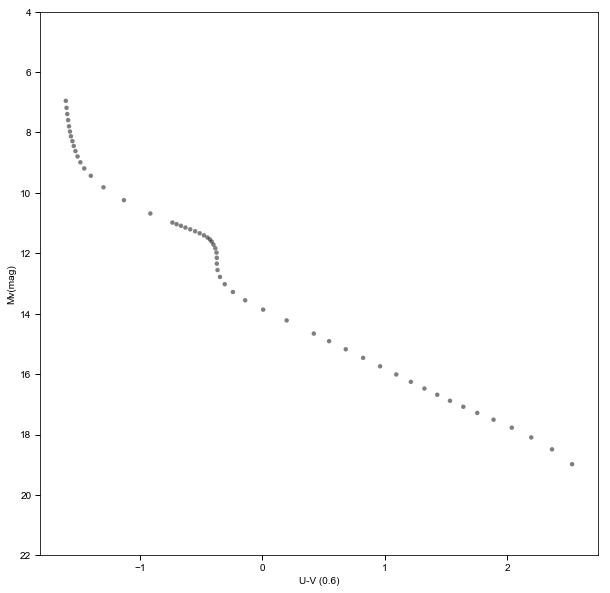

In [16]:
#plotting model WD curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_6, Mv_6, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(22,4)
plt.xlabel('U-V (0.6)')
plt.ylabel('Mv(mag)')

In [17]:
#using weighted averages for U-V from Maddie's table and the Table txt file to find corresponding Mv for each WD
Mv_wd_6 = np.array([])
for j in range(len(maddie_UV)):
    for i in range(len(UV_6)):
        if (maddie_UV[j] < UV_6[i]) and (maddie_UV[j] > UV_6[i+1]):
#             x1 = UV[i]
#             y1 = Mv[i]
#             x2 = UV[i+1]
#             y2 = Mv[i+1]
#             x = [x1, x2]
#             y = [y1, y2]
#             plt.scatter(UV, Mv, c='black',edgecolors='none',s=5,alpha=0.5)
#             plt.plot(x, y)
#             plt.ylim(22,4)
            weight1_6 = ((UV_6[i] - maddie_UV[j]) / (UV_6[i] - UV_6[i+1])) * 100
            weight2_6 = ((maddie_UV[j] - UV_6[i+1]) / (UV_6[i] - UV_6[i+1])) * 100
            Mv_wd_6 = np.append(Mv_wd_6, ((Mv_6[i]*weight2_6) + (Mv_6[i+1]*weight1_6)) / (weight1_6 + weight2_6))
            #UV_wd = np.append(UV_wd, (((x1*(UV[i]-x1)) + (weight1)) / ((UV[i]-x1) + (UV[i+1]-x2))))
#             print(UV_wd)
#             for i in range(len(UV_wd)):
#                 Mv_wd = np.append(Mv_wd, )
print(maddie_UV)
print(Mv_wd_6)

[ 0.61  0.84  0.73  0.15  0.02 -0.25  0.65  0.18  0.17  0.67  0.88  0.27
  0.48 -0.28]
[15.03756618 15.4962446  15.276      14.13275    13.89103125 13.24634328
 15.11668382 14.18853125 14.1699375  15.15624265 15.57682014 14.36340541
 14.77848    13.1308209 ]


In [18]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Multiplying by 3.086e+13 to convert from pc to km
# Distance Modulus: mv - Mv = 5logD - 5
distance_wd_pc_6 = np.array([])
distance_wd_km_6 = np.array([])
for i in range(len(mv)):
    distance_wd_pc_6 = np.append(distance_wd_pc_6, (10 ** (((mv[i] - Mv_wd_6[i]) + 5) / 5)))
    distance_wd_km_6 = np.append(distance_wd_km_6, (distance_wd_pc_6[i] * 3.086e+13))
print(distance_wd_pc_6)
print(distance_wd_km_6)

[ 82.54423837 192.73078004  76.03262769 651.10345518 532.10060167
 620.77089009 267.21647784 506.40006179 470.12408374 129.10749968
 120.4580896  320.27196098 230.41141976 311.91468428]
[2.54731520e+15 5.94767187e+15 2.34636689e+15 2.00930526e+16
 1.64206246e+16 1.91569897e+16 8.24630051e+15 1.56275059e+16
 1.45080292e+16 3.98425744e+15 3.71733665e+15 9.88359272e+15
 7.11049641e+15 9.62568716e+15]


In [19]:
#Using trend line to guess Mv
def fitline(x):
    return 1.95*x+13.5

#Using distance modulus equation to solve for D given mv and Mv
print 19.79-fitline(0.61)
distance_wd_trend_6 = 10**((mv-fitline(maddie_UV)+5)/5)

print ('Distance in parsecs: ')
print distance_wd_trend_6
print
print('Distance in km: ')
distance_wd_km_trend_6 = distance_wd_trend_6 * 3.086e+13
print distance_wd_km_trend_6

5.1005
Distance in parsecs: 
[ 96.894695   227.30029533  89.43345319 761.55276627 625.74876335
 691.35323604 313.83400564 591.56163418 549.41435196 151.67010939
 142.23287871 374.02445604 269.77394324 338.37634886]

Distance in km: 
[2.99017029e+15 7.01448711e+15 2.75991637e+15 2.35015184e+16
 1.93106068e+16 2.13351609e+16 9.68491741e+15 1.82555920e+16
 1.69549269e+16 4.68053958e+15 4.38930664e+15 1.15423947e+16
 8.32522389e+15 1.04422941e+16]


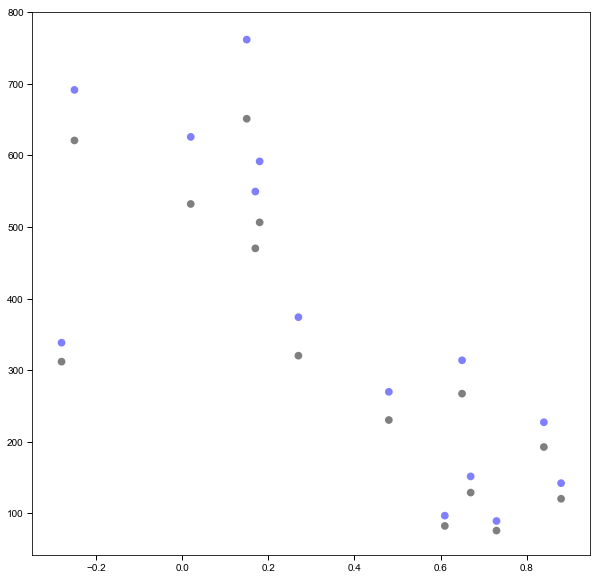

In [20]:
#plotting distance calculated from weighted averages against distance calculated by trend to compare accuracy
fig=plt.figure(figsize=(10,10))
plt.scatter(maddie_UV, distance_wd_pc_6, c='black',edgecolors='none',s=60,alpha=0.5)
plt.scatter(maddie_UV, distance_wd_trend_6, c='blue',edgecolors='none',s=60,alpha=0.5)

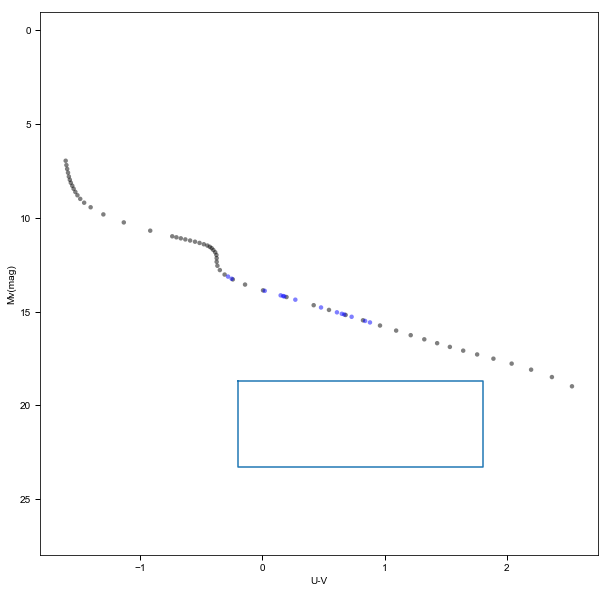

In [21]:
#plotting Mv calculated from weighted averages against UV vs Mv (table txt file) plot
#Mv from weighted averages should lay on the curve since it is an average of two Mv points on the curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_6, Mv_6, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(28,-1)
plt.xlabel('U-V')
plt.ylabel('Mv(mag)')
plt.scatter(maddie_UV, Mv_wd_6, c='blue',edgecolors='none',s=20,alpha=0.5)
x_array = [-0.2, 1.8, 1.8, -0.2, -0.2]
y_array = [18.7, 18.7, 23.3, 23.3, 18.7]
plt.plot(x_array, y_array)

In [22]:
#converting PM from rad/sec to km/sec
PMW_km_per_sec_6 = np.array([])
PMW_km_per_sec_error_6 = np.array([])
PMN_km_per_sec_6 = np.array([])
PMN_km_per_sec_error_6 = np.array([])

print('PMW in km per sec')
for i in range(len(PMW)):
    print(PMW_radians_per_sec[i] * distance_wd_km_6[i], 'error:', PMW_error_radians_per_sec[i] * distance_wd_km_6[i])
    PMW_km_per_sec_6 = np.append(PMW_km_per_sec_6, (PMW_radians_per_sec[i] * distance_wd_km_6[i]))
    PMW_km_per_sec_error_6 = np.append(PMW_km_per_sec_error_6, (PMW_error_radians_per_sec[i] * distance_wd_km_6[i]))

# print(PMW_km_per_sec_6)
# print(PMW_km_per_sec_error_6)

print

print('PMN in km per sec')
for j in range(len(PMN)):
    print(PMN_radians_per_sec[j] * distance_wd_km_6[j], 'error: ', PMN_error_radians_per_sec[j] * distance_wd_km_6[j])
    PMN_km_per_sec_6 = np.append(PMN_km_per_sec_6, (PMN_radians_per_sec[j] * distance_wd_km_6[j]))
    PMN_km_per_sec_error_6 = np.append(PMN_km_per_sec_error_6, (PMN_error_radians_per_sec[j] * distance_wd_km_6[j]))

# print(PMN_km_per_sec_6)
# print(PMN_km_per_sec_error_6)

PMW in km per sec
(0.9000797980567135, 'error:', 0.03913390426333538)
(0.0, 'error:', 0.0)
(0.5407016222416411, 'error:', 0.14418709926443762)
(31.485934327633913, 'error:', 0.3086856306630777)
(19.424546520591033, 'error:', 0.2522668379297537)
(-7.063321891983829, 'error:', 0.588610157665319)
(0.0, 'error:', 0.0)
(-23.28798420014287, 'error:', 0.48016462268335824)
(4.011912187300375, 'error:', 0.4457680208111528)
(0.12241873283331335, 'error:', 0.12241873283331335)
(0.9137394326347492, 'error:', 0.1713261436190155)
(31.840784753855658, 'error:', 0.19739160791612953)
(0.0, 'error:', 0.0)
(8.103689511188808, 'error:', 0.19224080957199732)

PMN in km per sec
(-1.2914188406900673, 'error: ', 0.03913390426333538)
(0.0, 'error: ', 0.0)
(-0.8651225955866257, 'error: ', 0.14418709926443762)
(18.82982347044774, 'error: ', 0.3086856306630777)
(-3.2794688930867975, 'error: ', 0.2522668379297537)
(-25.898846937274044, 'error: ', 0.588610157665319)
(0.0, 'error: ', 0.0)
(-36.25242901259354, 'error

In [23]:
'*******************************************************************************************************************'

'*******************************************************************************************************************'

In [24]:
Mv_7 = np.loadtxt('Table_Mass_0.7.txt',usecols=(3),unpack=True)
print(Mv_7)

[19.186 18.684 18.29  17.965 17.696 17.466 17.261 17.063 16.866 16.662
 16.445 16.205 15.942 15.667 15.387 15.12  14.872 14.437 14.08  13.774
 13.5   13.244 13.006 12.78  12.569 12.377 12.204 12.06  11.937 11.833
 11.758 11.691 11.626 11.559 11.492 11.429 11.37  11.314 11.261 11.208
 10.915 10.488 10.079  9.732  9.504  9.329  9.169  9.035  8.902  8.777
  8.653  8.535  8.416  8.282  8.149  8.019  7.887]


In [25]:
UB_7 = np.loadtxt('Table_Mass_0.7.txt', usecols=(4),unpack=True)
print(UB_7)

BV_7 = np.loadtxt('Table_Mass_0.7.txt', usecols=(5),unpack=True)
print(BV_7)

UV_7 = UB_7 + BV_7
print(UV_7)

[ 1.066  0.913  0.784  0.676  0.582  0.502  0.435  0.376  0.318  0.261
  0.203  0.14   0.071 -0.003 -0.077 -0.15  -0.216 -0.334 -0.438 -0.517
 -0.569 -0.6   -0.615 -0.619 -0.617 -0.611 -0.607 -0.608 -0.614 -0.62
 -0.624 -0.632 -0.642 -0.656 -0.673 -0.691 -0.711 -0.73  -0.751 -0.771
 -0.881 -1.013 -1.112 -1.171 -1.199 -1.215 -1.227 -1.236 -1.243 -1.249
 -1.254 -1.258 -1.263 -1.265 -1.268 -1.271 -1.274]
[ 1.387  1.407  1.371  1.321  1.269  1.22   1.176  1.132  1.089  1.044
  0.996  0.943  0.884  0.821  0.756  0.693  0.636  0.534  0.446  0.375
  0.322  0.283  0.255  0.236  0.224  0.216  0.209  0.2    0.19   0.181
  0.171  0.161  0.147  0.131  0.114  0.095  0.078  0.062  0.046  0.032
 -0.037 -0.121 -0.189 -0.234 -0.257 -0.273 -0.284 -0.292 -0.299 -0.304
 -0.31  -0.314 -0.318 -0.322 -0.325 -0.327 -0.331]
[ 2.453  2.32   2.155  1.997  1.851  1.722  1.611  1.508  1.407  1.305
  1.199  1.083  0.955  0.818  0.679  0.543  0.42   0.2    0.008 -0.142
 -0.247 -0.317 -0.36  -0.383 -0.393 -0.395 -0.3

Text(0,0.5,'Mv(mag)')

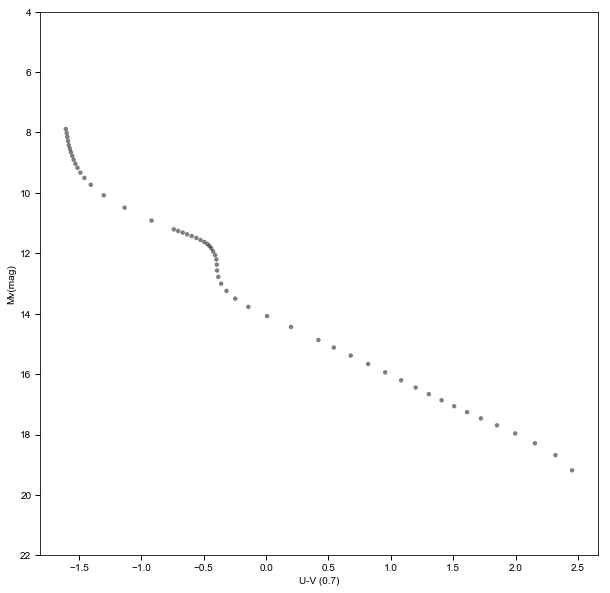

In [26]:
#plotting model WD curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_7, Mv_7, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(22,4)
plt.xlabel('U-V (0.7)')
plt.ylabel('Mv(mag)')

In [27]:
#using weighted averages for U-V from Maddie's table and the Table txt file to find corresponding Mv for each WD
Mv_wd_7 = np.array([])
for j in range(len(maddie_UV)):
    for i in range(len(UV_7)):
        if (maddie_UV[j] < UV_7[i]) and (maddie_UV[j] > UV_7[i+1]):
#             x1 = UV[i]
#             y1 = Mv[i]
#             x2 = UV[i+1]
#             y2 = Mv[i+1]
#             x = [x1, x2]
#             y = [y1, y2]
#             plt.scatter(UV, Mv, c='black',edgecolors='none',s=5,alpha=0.5)
#             plt.plot(x, y)
#             plt.ylim(22,4)
            weight1_7 = ((UV_7[i] - maddie_UV[j]) / (UV_7[i] - UV_7[i+1])) * 100
            weight2_7 = ((maddie_UV[j] - UV_7[i+1]) / (UV_7[i] - UV_7[i+1])) * 100
            Mv_wd_7 = np.append(Mv_wd_7, ((Mv_7[i]*weight2_7) + (Mv_7[i+1]*weight1_7)) / (weight1_7 + weight2_7))
            #UV_wd = np.append(UV_wd, (((x1*(UV[i]-x1)) + (weight1)) / ((UV[i]-x1) + (UV[i+1]-x2))))
#             print(UV_wd)
#             for i in range(len(UV_wd)):
#                 Mv_wd = np.append(Mv_wd, )
print(maddie_UV)
print(Mv_wd_7)

[ 0.61  0.84  0.73  0.15  0.02 -0.25  0.65  0.18  0.17  0.67  0.88  0.27
  0.48 -0.28]
[15.25153676 15.71116058 15.48973381 14.34403125 14.1023125  13.48902857
 15.33006618 14.3998125  14.38121875 15.36933088 15.79145255 14.57540909
 14.99297561 13.37931429]


In [28]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Multiplying by 3.086e+13 to convert from pc to km
# Distance Modulus: mv - Mv = 5logD - 5
distance_wd_pc_7 = np.array([])
distance_wd_km_7 = np.array([])
for i in range(len(mv)):
    distance_wd_pc_7 = np.append(distance_wd_pc_7, (10 ** (((mv[i] - Mv_wd_7[i]) + 5) / 5)))
    distance_wd_km_7 = np.append(distance_wd_km_7, (distance_wd_pc_7[i] * 3.086e+13))
print(distance_wd_pc_7)
print(distance_wd_km_7)

[ 74.79845839 174.56930513  68.90539671 590.73642443 482.76691571
 555.1294732  242.20704139 459.44920036 426.53654816 117.03986806
 109.1212894  290.48130154 208.73961497 278.18719973]
[2.30828043e+15 5.38720876e+15 2.12642054e+15 1.82301261e+16
 1.48981870e+16 1.71312955e+16 7.47450930e+15 1.41786023e+16
 1.31629179e+16 3.61185033e+15 3.36748299e+15 8.96425297e+15
 6.44170452e+15 8.58485698e+15]


In [29]:
#Using trend line to guess Mv
def fitline(x):
    return 1.95*x+13.5

#Using distance modulus equation to solve for D given mv and Mv
print 19.79-fitline(0.61)
distance_wd_trend_7 = 10**((mv-fitline(maddie_UV)+5)/5)

print ('Distance in parsecs: ')
print distance_wd_trend_7
print
print('Distance in km: ')
distance_wd_km_trend_7 = distance_wd_trend_7 * 3.086e+13
print distance_wd_km_trend_7

5.1005
Distance in parsecs: 
[ 96.894695   227.30029533  89.43345319 761.55276627 625.74876335
 691.35323604 313.83400564 591.56163418 549.41435196 151.67010939
 142.23287871 374.02445604 269.77394324 338.37634886]

Distance in km: 
[2.99017029e+15 7.01448711e+15 2.75991637e+15 2.35015184e+16
 1.93106068e+16 2.13351609e+16 9.68491741e+15 1.82555920e+16
 1.69549269e+16 4.68053958e+15 4.38930664e+15 1.15423947e+16
 8.32522389e+15 1.04422941e+16]


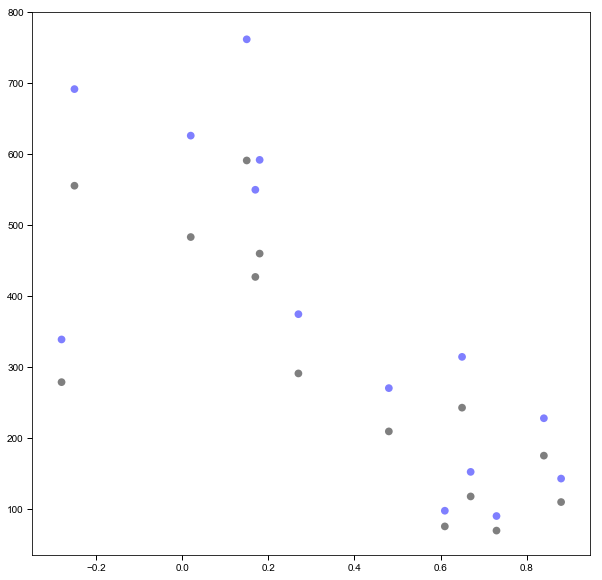

In [30]:
#plotting distance calculated from weighted averages against distance calculated by trend to compare accuracy
fig=plt.figure(figsize=(10,10))
plt.scatter(maddie_UV, distance_wd_pc_7, c='black',edgecolors='none',s=60,alpha=0.5)
plt.scatter(maddie_UV, distance_wd_trend_7, c='blue',edgecolors='none',s=60,alpha=0.5)

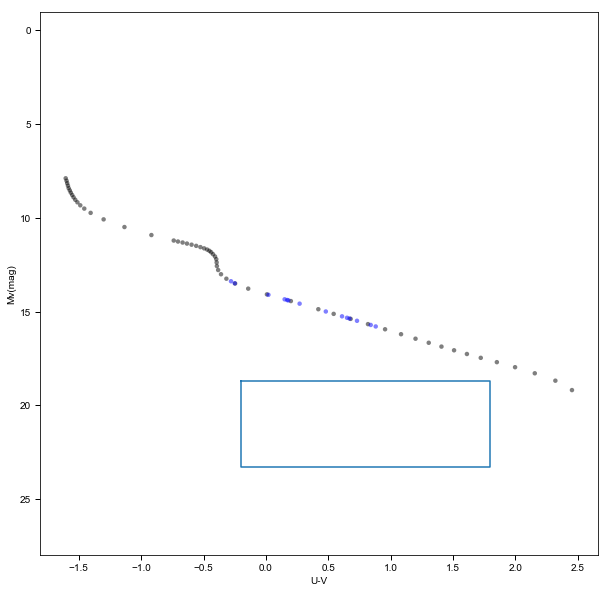

In [31]:
#plotting Mv calculated from weighted averages against UV vs Mv (table txt file) plot
#Mv from weighted averages should lay on the curve since it is an average of two Mv points on the curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_7, Mv_7, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(28,-1)
plt.xlabel('U-V')
plt.ylabel('Mv(mag)')
plt.scatter(maddie_UV, Mv_wd_7, c='blue',edgecolors='none',s=20,alpha=0.5)
x_array = [-0.2, 1.8, 1.8, -0.2, -0.2]
y_array = [18.7, 18.7, 23.3, 23.3, 18.7]
plt.plot(x_array, y_array)

In [32]:
#converting PM from rad/sec to km/sec
PMW_km_per_sec_7 = np.array([])
PMW_km_per_sec_error_7 = np.array([])
PMN_km_per_sec_7 = np.array([])
PMN_km_per_sec_error_7 = np.array([])

print('PMW in km per sec')
for i in range(len(PMW)):
    print(PMW_radians_per_sec[i] * distance_wd_km_7[i], 'error:', PMW_error_radians_per_sec[i] * distance_wd_km_7[i])
    PMW_km_per_sec_7 = np.append(PMW_km_per_sec_7, (PMW_radians_per_sec[i] * distance_wd_km_7[i]))
    PMW_km_per_sec_error_7 = np.append(PMW_km_per_sec_error_7, (PMW_error_radians_per_sec[i] * distance_wd_km_7[i]))

# print(PMW_km_per_sec_7)
# print(PMW_km_per_sec_error_7)

print

print('PMN in km per sec')
for j in range(len(PMN)):
    print(PMN_radians_per_sec[j] * distance_wd_km_7[j], 'error: ', PMN_error_radians_per_sec[j] * distance_wd_km_7[j])
    PMN_km_per_sec_7 = np.append(PMN_km_per_sec_7, (PMN_radians_per_sec[j] * distance_wd_km_7[j]))
    PMN_km_per_sec_error_7 = np.append(PMN_km_per_sec_error_7, (PMN_error_radians_per_sec[j] * distance_wd_km_7[j]))

# print(PMN_km_per_sec_7)
# print(PMN_km_per_sec_error_7)

PMW in km per sec
(0.8156181781641086, 'error:', 0.03546165992017865)
(0.0, 'error:', 0.0)
(0.4900167324271179, 'error:', 0.13067112864723143)
(28.56671718842632, 'error:', 0.2800658547884934)
(17.623600468484305, 'error:', 0.22887792816213387)
(-6.316433685202272, 'error:', 0.5263694737668559)
(0.0, 'error:', 0.0)
(-21.128839678425827, 'error:', 0.43564617893661506)
(3.6399479096551586, 'error:', 0.40443865662835093)
(0.11097629784417301, 'error:', 0.11097629784417301)
(0.8277437023314349, 'error:', 0.15520194418714406)
(28.879058188296145, 'error:', 0.17903088051876487)
(0.0, 'error:', 0.0)
(7.227433674110624, 'error:', 0.17145371854641997)

PMN in km per sec
(-1.1702347773658952, 'error: ', 0.03546165992017865)
(0.0, 'error: ', 0.0)
(-0.7840267718833887, 'error: ', 0.13067112864723143)
(17.084017142098098, 'error: ', 0.2800658547884934)
(-2.97541306610774, 'error: ', 0.22887792816213387)
(-23.160256845741667, 'error: ', 0.5263694737668559)
(0.0, 'error: ', 0.0)
(-32.891286509714426,

In [33]:
#creating an array with PMW (+ error, no error, - error) for every WD --- 9 PM values for each WD
PMW_with_error = np.array([])
for i in range(0, len(PMW_km_per_sec_5)):
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_5[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_5[i] + PMW_km_per_sec_error_5[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_5[i] - PMW_km_per_sec_error_5[i])
    
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_6[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_6[i] + PMW_km_per_sec_error_6[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_6[i] - PMW_km_per_sec_error_6[i])
    
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_7[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_7[i] + PMW_km_per_sec_error_7[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_7[i] - PMW_km_per_sec_error_7[i])

print(PMW_with_error)
print(len(PMW_with_error))

#creating an array with PMN (+ error, no error, - error) for every WD --- 9 PM values for each WD
PMN_with_error = np.array([])
for i in range(0, len(PMN_km_per_sec_5)):
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_5[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_5[i] + PMN_km_per_sec_error_5[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_5[i] - PMN_km_per_sec_error_5[i])

    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_6[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_6[i] + PMN_km_per_sec_error_6[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_6[i] - PMN_km_per_sec_error_6[i])
    
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_7[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_7[i] + PMN_km_per_sec_error_7[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_7[i] - PMN_km_per_sec_error_7[i])

print(PMN_with_error)
print(len(PMN_with_error))
    
# [1:3] = including index 1, not including index 3

[  0.99353029   1.03672726   0.95033332   0.9000798    0.9392137
   0.86094589   0.81561818   0.85107984   0.78015652   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.59661194   0.75570845
   0.43751542   0.54070162   0.68488872   0.39651452   0.49001673
   0.62068786   0.3593456   34.70729378  35.04756137  34.3670262
  31.48593433  31.79461996  31.1772487   28.56671719  28.84678304
  28.28665133  21.41857     21.69673325  21.14040675  19.42454652
  19.67681336  19.17227968  17.62360047  17.8524784   17.39472254
  -7.90011132  -7.24176871  -8.55845393  -7.06332189  -6.47471173
  -7.65193205  -6.31643369  -5.79006421  -6.84280316   0.
   0.           0.           0.           0.           0.
   0.           0.           0.         -25.66875557 -25.13950288
 -26.19800826 -23.2879842  -22.80781958 -23.76814882 -21.12883968
 -20.6931935  -21.56448586   4.42216306   4.91351451   3.9308116
   4.01191219   4.45768021   3.56614417   3.6

In [34]:
#calculating mean PMW from the 9 values for each WD
PMW_mean = np.array([])
PMW_mean = np.append(PMW_mean,(np.mean(PMW_with_error[:9]),np.mean(PMW_with_error[9:18]),np.mean(PMW_with_error[18:27]),np.mean(PMW_with_error[27:36]),np.mean(PMW_with_error[36:45]), np.mean(PMW_with_error[45:54]),np.mean(PMW_with_error[54:63]),np.mean(PMW_with_error[63:72]),np.mean(PMW_with_error[72:81]),np.mean(PMW_with_error[81:90]),np.mean(PMW_with_error[90:99]),np.mean(PMW_with_error[99:108]),np.mean(PMW_with_error[108:117]),np.mean(PMW_with_error[117:126])))
print PMW_mean

print

PMW_standard_deviation = np.array([])
PMW_standard_deviation = np.append(PMW_standard_deviation,(np.std(PMW_with_error[:9]),np.std(PMW_with_error[9:18]),np.std(PMW_with_error[18:27]),np.std(PMW_with_error[27:36]),np.std(PMW_with_error[36:45]), np.std(PMW_with_error[45:54]),np.std(PMW_with_error[54:63]),np.std(PMW_with_error[63:72]),np.std(PMW_with_error[72:81]),np.std(PMW_with_error[81:90]),np.std(PMW_with_error[90:99]),np.std(PMW_with_error[99:108]),np.std(PMW_with_error[108:117]),np.std(PMW_with_error[117:126])))
print PMW_standard_deviation

[  0.90307609   0.           0.54244343  31.58664843  19.48890566
  -7.09328896   0.         -23.36185982   4.02467438   0.122832
   0.91653333  31.94578587   0.           8.14317025]

[0.07946307 0.         0.12623197 2.52068504 1.56376067 0.80828879
 0.         1.89565942 0.48601963 0.10109538 0.1588766  2.55307972
 0.         0.7805692 ]


In [35]:
#calculating mean PMW from the 9 values for each WD
PMN_mean = np.array([])
PMN_mean = np.append(PMN_mean,(np.mean(PMN_with_error[:9]),np.mean(PMN_with_error[9:18]),np.mean(PMN_with_error[18:27]),np.mean(PMN_with_error[27:36]),np.mean(PMN_with_error[36:45]), np.mean(PMN_with_error[45:54]),np.mean(PMN_with_error[54:63]),np.mean(PMN_with_error[63:72]),np.mean(PMN_with_error[72:81]),np.mean(PMN_with_error[81:90]),np.mean(PMN_with_error[90:99]),np.mean(PMN_with_error[99:108]),np.mean(PMN_with_error[108:117]),np.mean(PMN_with_error[117:126])))
print PMN_mean

print

PMN_standard_deviation = np.array([])
PMN_standard_deviation = np.append(PMN_standard_deviation,(np.std(PMN_with_error[:9]),np.std(PMN_with_error[9:18]),np.std(PMN_with_error[18:27]),np.std(PMN_with_error[27:36]),np.std(PMN_with_error[36:45]), np.std(PMN_with_error[45:54]),np.std(PMN_with_error[54:63]),np.std(PMN_with_error[63:72]),np.std(PMN_with_error[72:81]),np.std(PMN_with_error[81:90]),np.std(PMN_with_error[90:99]),np.std(PMN_with_error[99:108]),np.std(PMN_with_error[108:117]),np.std(PMN_with_error[117:126])))
print PMN_standard_deviation

[ -1.29571787   0.          -0.86790949  18.89005446  -3.29033472
 -26.0087262    0.         -36.36743126  10.73246502  -0.79840799
  -1.31751666  20.90110549   0.          11.27858799]

[0.10910423 0.         0.13744503 1.5211136  0.33384802 2.42090242
 0.         2.91319492 0.92731011 0.11926879 0.14149149 1.67615162
 0.         1.07040456]


In [36]:
#(GOODS-N:) 11200, 2047, 2365, 9466      (EGS:) 5833,  9359,  irac095466, irac1128062  (COSMOS:) 8913,  3188,  uv27611      (EGS:) 6592, 10234     (GOODS-N:) 8114 
ID = np.array([11200, 2047, 2365, 9466, 5833,  9359, 'irac095466', 'irac1128062', 8913,  3188,  'uv27611', 6592, 10234, 8114])
fields = np.array(['GOODS-N','GOODS-N','GOODS-N','GOODS-N','EGS','EGS','EGS','EGS','COSMOS','COSMOS','COSMOS','EGS','EGS','GOODS-N'])
table_data = np.array([ID, fields, PMW_mean, PMW_standard_deviation, PMN_mean, PMN_standard_deviation])
print(table_data)
edited_table_data = np.transpose(table_data)
print edited_table_data
print edited_table_data.shape
np.savetxt('transverse_velocities_data.csv',edited_table_data,delimiter=',',fmt='%s',header='ID,Field,PMW,PMW error,PMN,PMN error')

[['11200' '2047' '2365' '9466' '5833' '9359' 'irac095466' 'irac1128062'
  '8913' '3188' 'uv27611' '6592' '10234' '8114']
 ['GOODS-N' 'GOODS-N' 'GOODS-N' 'GOODS-N' 'EGS' 'EGS' 'EGS' 'EGS'
  'COSMOS' 'COSMOS' 'COSMOS' 'EGS' 'EGS' 'GOODS-N']
 ['0.9030760877926506' '0.0' '0.5424434304814528' '31.586648433298844'
  '19.48890566317076' '-7.093288964704089' '0.0' '-23.361859816396468'
  '4.0246743840163735' '0.12283199875207511' '0.916533326735954'
  '31.94578587168665' '0.0' '8.143170248284221']
 ['0.07946307144514182' '0.0' '0.12623196854176405' '2.52068504444327'
  '1.5637606729347802' '0.8082887851089945' '0.0' '1.8956594230241846'
  '0.4860196313793968' '0.1010953781794608' '0.15887660412014193'
  '2.5530797217191044' '0.0' '0.7805692043992035']
 ['-1.2957178650938033' '0.0' '-0.8679094887703244' '18.890054455208137'
  '-3.290334722353504' '-26.008726203915' '0.0' '-36.36743126057594'
  '10.732465024043664' '-0.7984079918884883' '-1.3175166571829338'
  '20.901105491632848' '0.0' '11.2785

[2.81178936e+15 6.56109523e+15 2.58898889e+15 2.21487942e+16
 1.81062810e+16 2.14265119e+16 9.10121914e+15 1.72251332e+16
 1.59915940e+16 4.39701519e+15 4.10128923e+15 1.09007116e+16
 7.85245481e+15 1.08072048e+16]


(array([4., 0., 2., 1., 2., 0., 1., 2., 0., 2.]),
 array([2.58898889e+15, 4.54496943e+15, 6.50094996e+15, 8.45693049e+15,
        1.04129110e+16, 1.23688916e+16, 1.43248721e+16, 1.62808526e+16,
        1.82368332e+16, 2.01928137e+16, 2.21487942e+16]),
 <a list of 1 Patch objects>)

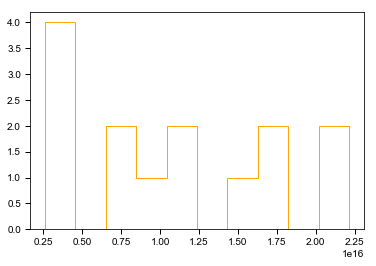

In [37]:
print distance_wd_km_5
plt.hist(distance_wd_km_5,color='orange',histtype='step')

In [38]:
table_distance_data = np.array([ID, fields, distance_wd_km_5, distance_wd_km_6, distance_wd_km_7])
print(table_distance_data)
edited_table_distance_data = np.transpose(table_distance_data)
print edited_table_distance_data
print edited_table_distance_data.shape
np.savetxt('distance_data.csv',edited_table_distance_data,delimiter=',',fmt='%s',header='ID,Field,Distance (0.5),Distance (0.6),Distance (0.7)')

[['11200' '2047' '2365' '9466' '5833' '9359' 'irac095466' 'irac1128062'
  '8913' '3188' 'uv27611' '6592' '10234' '8114']
 ['GOODS-N' 'GOODS-N' 'GOODS-N' 'GOODS-N' 'EGS' 'EGS' 'EGS' 'EGS'
  'COSMOS' 'COSMOS' 'COSMOS' 'EGS' 'EGS' 'GOODS-N']
 ['2811789358980980.0' '6561095230068659.0' '2588988894107137.0'
  '2.2148794228963544e+16' '1.810628095625501e+16'
  '2.142651194287217e+16' '9101219137610918.0' '1.7225133178233744e+16'
  '1.599159399358226e+16' '4397015185744576.5' '4101289227045830.0'
  '1.090071161574057e+16' '7852454805934223.0' '1.0807204811917638e+16']
 ['2547315196249631.5' '5947671872141141.0' '2346366890637402.0'
  '2.0093052626713332e+16' '1.6420624567489436e+16'
  '1.915698966806803e+16' '8246300506139109.0' '1.5627505906799366e+16'
  '1.450802922414049e+16' '3984257440217706.5' '3717336645132110.5'
  '9883592715871054.0' '7110496413898939.0' '9625687156802826.0']
 ['2308280425869488.0' '5387208756269508.0' '2126420542366129.5'
  '1.8230126057771664e+16' '1.48981870188651

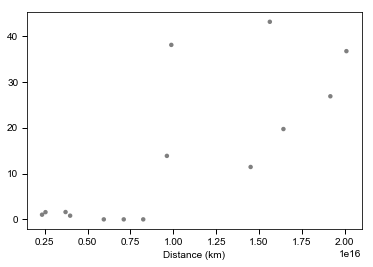

In [54]:
plt.scatter(distance_wd_km_6, np.sqrt((PMW_km_per_sec_6 ** 2) + (PMN_km_per_sec_6 ** 2)),c='black',edgecolors='none',s=20,alpha=0.5)
plt.xlabel('Distance (km)')
plt.savefig(out_dir+'dist_vs_PM_km.pdf')


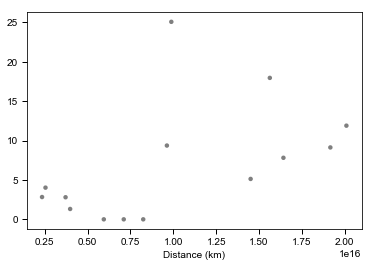

In [59]:
plt.scatter(distance_wd_km_6, np.sqrt((PMW ** 2) + (PMN ** 2)),c='black',edgecolors='none',s=20,alpha=0.5)

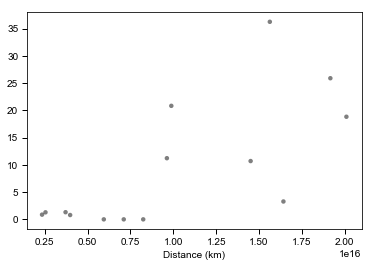

In [60]:
plt.scatter(distance_wd_km_6, np.abs(PMW_km_per_sec_6),c='black',edgecolors='none',s=20,alpha=0.5)
plt.xlabel('Distance (km)')
plt.savefig(out_dir+'dist_vs_abs_PMW_km.pdf')

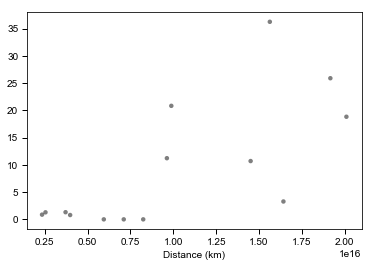

In [61]:
plt.scatter(distance_wd_km_6, np.abs(PMN_km_per_sec_6),c='black',edgecolors='none',s=20,alpha=0.5)
plt.xlabel('Distance (km)')
plt.savefig(out_dir+'dist_vs_abs_PMN_km.pdf')